The most common analytical task is to take a bunch of numbers in dataset and summarise it with fewer numbers, preferably a single number. Enter the 'average', sum all the numbers and divide by the count of the numbers. In mathematical terms this is known as the 'arithmetic mean', and doesn't always summarise a dataset correctly. This post looks into the other types of ways that we can summarise a dataset.

> The proper term for this method of summarising is determining the central tendency of the dataset.

## Generate The Data

First step is to generate a dataset to summarise, to do this we use the `random` package from the standard library. Using matplotlib we can plot our 'number line'.

[82, 15, 4, 95, 36, 32, 29, 18, 95, 14, 87, 95, 70, 12, 76, 55, 5, 4, 12, 28, 30, 65, 78, 4, 72, 26, 92, 84, 90, 70, 54, 29, 58, 76, 36, 1, 98, 21, 90, 55, 44, 36, 20, 28, 98, 44, 14, 12, 49, 13]


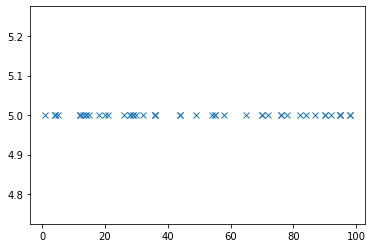

In [1]:
import random
import typing

random.seed(42)

dataset: typing.List = []
for _ in range(50):
    dataset.append(random.randint(1,100))

print(dataset)

import matplotlib.pyplot as plt

def plot_1d_data(arr:typing.List, val:float, **kwargs):
    constant_list = [val for _ in range(len(arr))]
    plt.plot(arr, constant_list, 'x', **kwargs)

plot_1d_data(dataset,5)

## Median

The median is the middle number of the sorted list, in the quite literal sense. For example the median of 1,2,3,4,5 is 3; as is the same for 3,2,4,1,5. The median can be more descriptive of the dataset over the arithmetic mean whenever there are significant outliers in the data that skew the arithmetic mean.

> If there is an even amount of numbers in the data, the median becomes the arithmetic mean of the two middle numbers. For example, the median for 1,2,3,4,5,6 is 3.5 (3+4/2).

### When to use

Use the median whenever there is a large spread of numbers across the domain


Median: 40.0


Text(40.0, 5.1, 'Median')

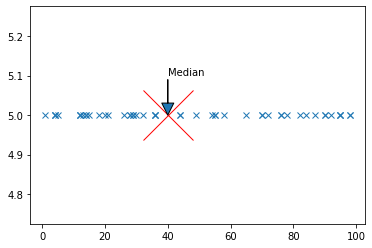

In [3]:
import statistics

print(f"Median: {statistics.median(dataset)}")

plot_1d_data(dataset,5)
plt.plot(statistics.median(dataset),5,'x',color='red',markersize=50)
plt.annotate('Median',(statistics.median(dataset),5),(statistics.median(dataset),5.1),arrowprops={'width':0.1})

## Mode

The mode of a dataset is the number the appears most in the dataset. It is to be noted that this is the least used method of demonstrating central tendency.

### When to use

Mode is best used with nominal data, meaning if the data you are trying to summarise has no quantitative metrics behind it, then mode would be useful. Eg, if you are looking through textual data, finding the most used word is a significant way of summarising the data.

Mode: 4


Text(4, 5.1, 'Mode')

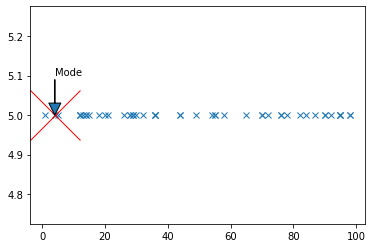

In [4]:
import statistics

print(f"Mode: {statistics.mode(dataset)}")

plot_1d_data(dataset,5)
plt.plot(statistics.mode(dataset),5,'x',color='red',markersize=50)
plt.annotate('Mode',(statistics.mode(dataset),5),(statistics.mode(dataset),5.1),arrowprops={'width':0.1})

## Arithmetic Mean

This is the most used way of representing central tendency. It is done by summing all the points in the dataset, and then dividing by the number of points (to scale back into the original domain). This is the best way of representing central tendency if the data does not containing outliers that will skew the outcome (which can be overcome by normalisation).

### When to use

If the dataset is normally distributed, this is the ideal measure. 

Arithmetic Mean: 47.02


Text(47.02, 5.1, 'Aritchmetic Mean')

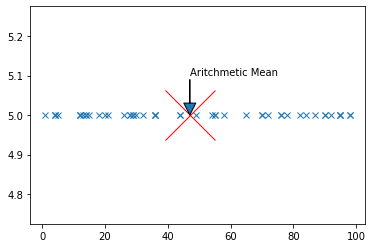

In [8]:
def arithmetic_mean(dataset: typing.List):
    return sum(dataset) / len(dataset)

print(f"Arithmetic Mean: {arithmetic_mean(dataset)}")

plot_1d_data(dataset,5)
plt.plot(arithmetic_mean(dataset),5,'x',color='red',markersize=50)
plt.annotate('Aritchmetic Mean',(arithmetic_mean(dataset),5),(arithmetic_mean(dataset),5.1),arrowprops={'width':0.1})

## Geometric Mean

The geometric mean is calculated by multiplying all numbers in a set, and then calculating the `nth` root of the multiplied figure, when n is the count of numbers. Since this using the `multiplicative` nature of the dataset to find a figure to summarise by, rather than an `additive` figure of the arithmetic mean, thus making it more suitable for datasets with a multiplicative relationship.

> We calculate the nth root by raising to the power of the reciprocal.

### When to use

If the dataset has a multiplicative nature (eg, growth in population, interest rates, etc), then geometric mean will be a more suitable way of summarising the dataset. The geometric mean is also useful when trying to summarise data with differenting scales or units as the geometric mean is technically unitless.

Geometric Mean: 32.54181835292063


Text(32.54181835292063, 5.1, 'Geometric Mean')

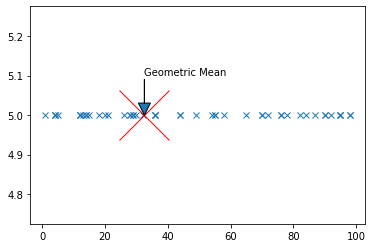

In [5]:

def multiply_list(dataset:typing.List) : 
    # Multiply elements one by one 
    result = 1
    for x in dataset: 
        result = result * x  
    return result  

def geometric_mean(dataset:typing.List):
    if 0 in dataset:
        dataset = [x + 1 for x in dataset]
    return multiply_list(dataset)**(1/len(dataset))

print(f"Geometric Mean: {geometric_mean(dataset)}")
plot_1d_data(dataset,5)
plt.plot(geometric_mean(dataset),5,'x',color='red',markersize=50)
plt.annotate('Geometric Mean',(geometric_mean(dataset),5),(geometric_mean(dataset),5.1),arrowprops={'width':0.1})

## Harmonic Mean

Harmonic mean is calculated by:

- taking the reciprocal of all the numbers in the set
- calculating the arithmetic mean of this reciprocal set
- taking the reciprocal of the calculated mean

### When to use

The harmonic mean is very useful when trying to summarise datasets that are in rates or ratios. For example if you were trying to determine the average rate of travel over a trip with many legs.

Harmonic Mean: 15.05101860509987


Text(15.05101860509987, 5.1, 'Harmonic Mean')

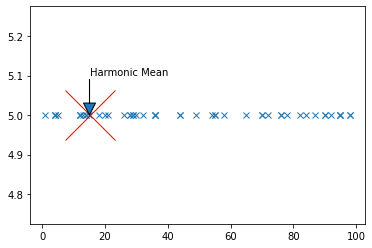

In [6]:
def reciprocal_list(dataset:typing.List):
    reciprocal_list = []
    for x in dataset:
        
        reciprocal_list.append(1/x)
    return reciprocal_list

def harmonic_mean(dataset:typing.List):
    return 1/arithmetic_mean(reciprocal_list(dataset))
    
print(f"Harmonic Mean: {harmonic_mean(dataset)}")
plot_1d_data(dataset,5)
plt.plot(harmonic_mean(dataset),5,'x',color='red',markersize=50)
plt.annotate('Harmonic Mean',(harmonic_mean(dataset),5),(harmonic_mean(dataset),5.1),arrowprops={'width':0.1})

In [7]:
print(f"Mode: {statistics.mode(dataset)}")
print(f"Median: {statistics.median(dataset)}")
print(f"Arithmetic Mean: {arithmetic_mean(dataset)}")
print(f"Geometric Mean: {geometric_mean(dataset)}")
print(f"Harmonic Mean: {harmonic_mean(dataset)}")

Mode: 4
Median: 40.0
Arithmetic Mean: 47.02
Geometric Mean: 32.54181835292063
Harmonic Mean: 15.05101860509987
